# Some playing with optimizing Maximum Likelihood

In [1]:
import numpy as np
import scipy.stats

In [2]:
## Generate the data

mu = 3.0
sigma = 0.5

X = np.random.randn(1000) * sigma + mu

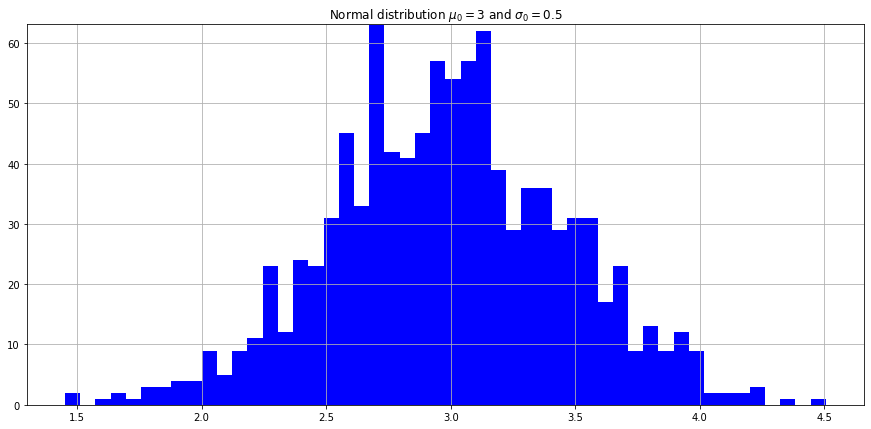

In [3]:
## Plot the data

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
hx, hy, _ = plt.hist(X, bins=50,color="blue")
plt.ylim(0.0,max(hx)+0.1)
plt.title(r'Normal distribution $\mu_0 = 3$ and $\sigma_0 = 0.5$')
plt.grid()
plt.show()

In [4]:
## Now we an objective that calculate the likelihood of data given input_mean and variance

from mango import scheduler, Tuner



@scheduler.parallel(n_jobs=5)
def get_likelihood_normal(**hyper_par):
    global X
    m = hyper_par['mu']
    v = hyper_par['sigma']
    
    log_res = scipy.stats.norm.pdf(X,m,v)
    
    result = np.log(log_res).sum()
    #print('result is:', result)
    
    return result    



@scheduler.parallel(n_jobs=5)
def get_likelihood_normal2(**hyper_par):
    global X
    m = hyper_par['mu']
    v = hyper_par['sigma']
    
    log_res = scipy.stats.norm.pdf(X,m,v)
    log_res= np.nan_to_num(log_res)
    result = np.log(log_res)


    result =  np.nan_to_num(result)
    result_sum = result.sum()
    
    
    return result_sum    

## Using Mango to find the best Mean and Sigma

In [5]:

from scipy.stats import uniform

param_dict = {"mu": uniform(1, 10),
              "sigma": uniform(0.3, 1)}


In [6]:
conf_Dict = dict()
#conf_Dict['batch_size'] = 10
conf_Dict['num_iteration'] = 100
conf_Dict['domain_size'] = 10000

In [7]:
tuner_user = Tuner(param_dict, get_likelihood_normal2, conf_Dict)

In [8]:
results = tuner_user.maximize()

  0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
print('best hyper parameters:',results['best_params'])
print('best objective:',results['best_objective'])

best hyper parameters: {'mu': 2.983670009130547, 'sigma': 0.4787188792644775}
best objective: -673.3903273335036


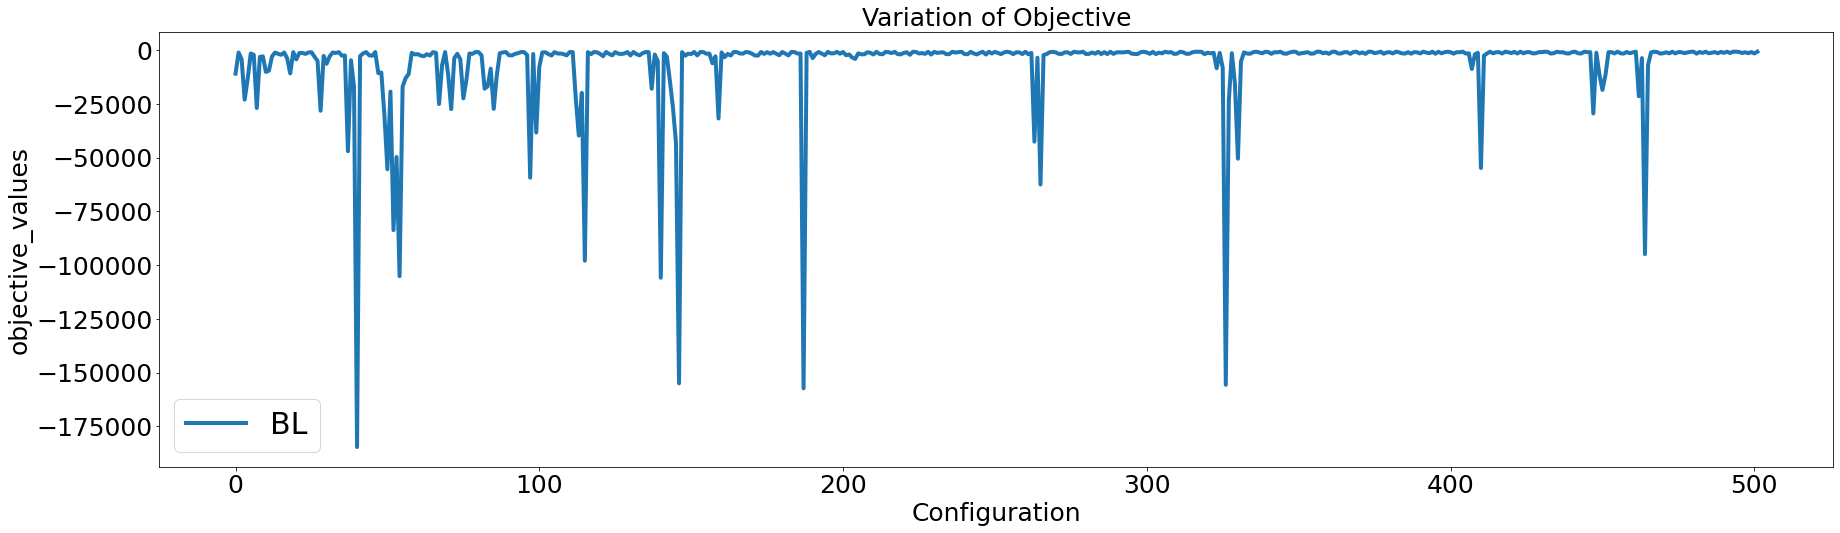

In [10]:
Size = len(results['objective_values']) 

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,8))

plt.title('Variation of Objective',fontsize=25)

plt.plot(results['objective_values'][:Size],lw=4,label='BL')

plt.xlabel('Configuration', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(prop={'size': 30})
plt.show()